In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('data/ipl.csv')


In [2]:
dataset

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [3]:
dataset.isnull().any

<bound method DataFrame.any of          mid   date  venue  bat_team  bowl_team  batsman  bowler   runs  \
0      False  False  False     False      False    False   False  False   
1      False  False  False     False      False    False   False  False   
2      False  False  False     False      False    False   False  False   
3      False  False  False     False      False    False   False  False   
4      False  False  False     False      False    False   False  False   
...      ...    ...    ...       ...        ...      ...     ...    ...   
76009  False  False  False     False      False    False   False  False   
76010  False  False  False     False      False    False   False  False   
76011  False  False  False     False      False    False   False  False   
76012  False  False  False     False      False    False   False  False   
76013  False  False  False     False      False    False   False  False   

       wickets  overs  runs_last_5  wickets_last_5  striker  non-str

In [4]:
data=dataset.iloc[:,7:14]
data

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker
0,1,0,0.1,1,0,0,0
1,1,0,0.2,1,0,0,0
2,2,0,0.2,2,0,0,0
3,2,0,0.3,2,0,0,0
4,2,0,0.4,2,0,0,0
...,...,...,...,...,...,...,...
76009,121,7,19.2,40,0,40,12
76010,127,7,19.3,46,0,46,12
76011,128,7,19.4,47,0,47,12
76012,129,7,19.5,48,0,47,13


<AxesSubplot:>

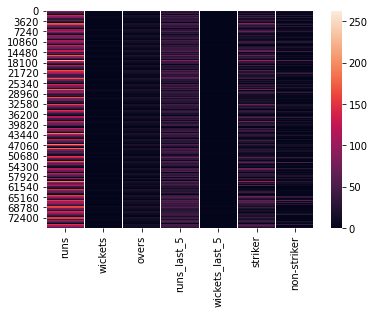

In [5]:

sns.heatmap(data)

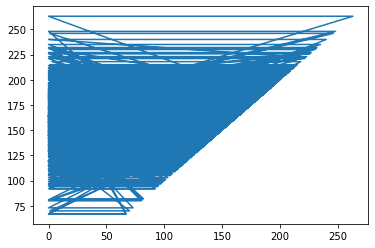

In [11]:
plt.plot(dataset['runs'],dataset['total'])

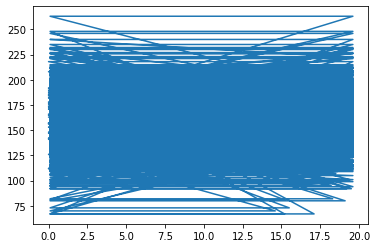

In [12]:
plt.plot(dataset['overs'],dataset['total'])

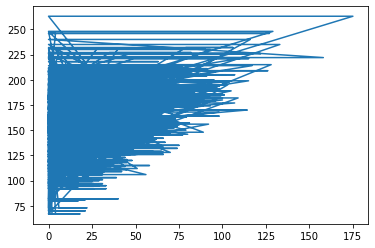

In [13]:
plt.plot(dataset['striker'],dataset['total'])

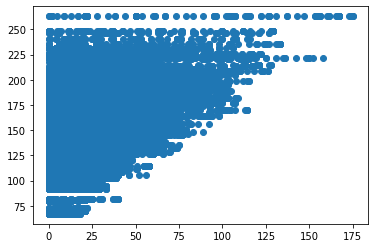

In [14]:
plt.scatter(dataset['striker'],dataset['total'])

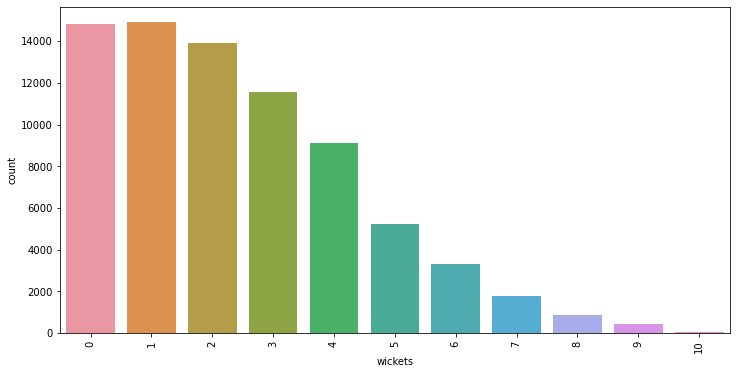

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='wickets', data=dataset)
plt.xticks(rotation='vertical')
plt.show()



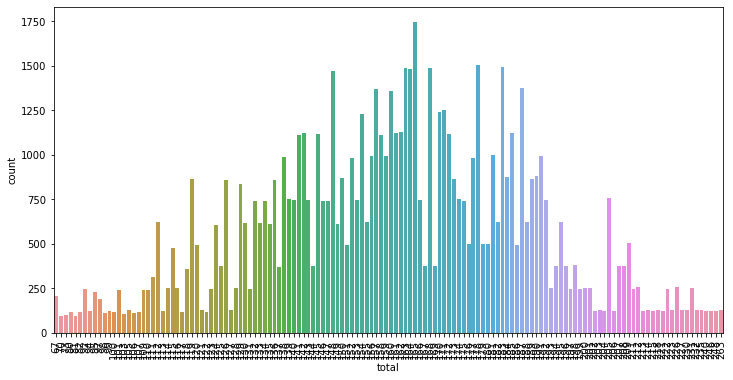

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='total', data=dataset)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
X = dataset.iloc[:,[7,8,9,12,13]].values
y = dataset.iloc[:, 14].values

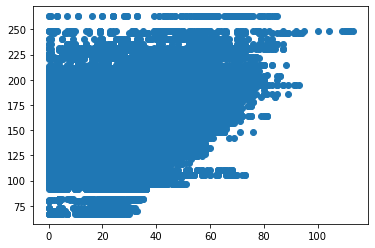

In [27]:
plt.scatter(dataset['runs_last_5'],dataset['total'])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [31]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [32]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,10))

R-squared value: 67.37644914011605
Custom accuracy: 65.48095137865712


In [33]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [173.96]


In [34]:
import joblib
joblib.dump(lin,'cricket_last.sav')

['cricket_last.sav']

In [35]:

joblib.dump(sc, 'std_scaler.bin', compress=True)

['std_scaler.bin']